# PROBLEM 7

Some random graphs have more structure than others. For the graph that represents the internet, nodes are web sites and there is a directed edge from one site, say `x`, to another site, say `y`, whenever site `x` has a link to site `y`. There are a few sites that are massively popular, like Google, Facebook, Twitter, and EdX, that have lots of incoming edges. However, most sites have very few incoming edges.

It is interesting to build random graphs that mimic this structure. The best way to do this is to grow the graph. There are `n` nodes and initially no edges. Edges are added at random, but in a non-uniform way.

To add in new edges to a graph, first choose a node `x` at random. Then choose another node `y` with a probability proportional to the popularity, or connectedness, of the node. For example, if a node has `k` edges it is twice as likely to be chosen than an node that has $\frac{k}{2}$ edges. Finally, add the edge from `x` to `y` to the graph.

Each node has a set of incoming edges and a set of outgoing edges. Each node has an in-degree, which is the number of incoming edges to the node, and an out-degree, the number of outgoing edges from the node. An edge cannot connect a node to itself and there can be at most one edge from a given `x` to a given `y`.

Suppose whenever a new edge—say it is (`x``,y`)-is added, there are three things updated:

* node `y` is added as an outgoing edge (or "out-edge") of node `x`
* node `x` is added as an incoming edge (or "in-edge") of node `y`
* (`x`,`y`) is added to the list allEdges

In [1]:
import numpy as np
import pylab, random
%matplotlib inline

class Node(object):
    def __init__(self, name):
        self.name = str(name)
        self.outEdges = []
        self.inEdges = []
        
    def getName(self):
        return self.name
    
    def __str__(self):
        return self.name
    
    
class Edge(object):
    def __init__(self, src, dest):
        self.src = src
        self.dest = dest
        
    def getSource(self):
        return self.src
    
    def getDestination(self):
        return self.dest
    
    def __str__(self):
        return str(self.src) + '->' + str(self.dest)

        
class siteGraph(object):
    def __init__(self, n):
        self.nodes = []
        for i in range(n):
            self.nodes.append(Node(i))
        self.edges = {}
        self.allEdges = []
        self.degrees = {}
        
    def addNode(self, node):
        if node in self.nodes:
            raise ValueError('Duplicate node')
        else:
            self.nodes.add(node)
            self.edges[node] = []
            
    def _addDegree(self, node):
        if self.degrees.has_key(node):
            self.degrees[node] += 1
        else:
            self.degrees[node] = 1
            
    def addEdges(self, n):
        for i in range(n):
            node = random.choice(self.nodes)
            notAdded = True
            while notAdded:
                newNode = random.choice(self.nodes)
                #print newNode.getName()
                if self.edges.has_key(node):
                    if not newNode in self.edges[node] and newNode.getName() != node.getName():
                        self.edges[node].append(newNode)
                        self._addDegree(node)
                        self._addDegree(newNode)
                        notAdded = False
                else:
                    self.edges[node] = [newNode]
                    self._addDegree(node)
                    self._addDegree(newNode)
                    notAdded = False
                    
    def getDegrees(self):
        return self.degrees.values()     
            
    def maxDegree(self):
        return np.max(np.array(self.getDegrees()))
    
    def meanDegree(self):
        return np.mean(np.array(self.getDegrees()))
                
    def meanDegreeVariances(self):
        return np.var(np.array(self.getDegrees()))
        
    def variance(self, c):
        sumEls = 0
        for el in c:
            sumEls += el
        mean = float(sumEls)/len(c)
        var = 0
        for el in c:
            var += (mean-el)**2
        return var
        
    
    def __str__(self):
        res = ''
        for k, d in self.allEdges:
            res = res + str(k) + '->' + str(d) + '\n'
        return res[:-1]


## Problem 7-1

(1 point possible)<br>
Now consider how to write some code to add an edge to a graph G, with all the nodes of G contained in the list G.allNodes and all the edges of G contained in the list G.allEdges. The items in G.allEdges are pairs of nodes, such as (x, y). (x, y) indicates a directed edge from node x to node y.

Assume we have built a graph G according to the above rules. Consider the lines of pseudocode:

```python
z = random.choice(G.allNodes)
(x,y) = random.choice(G.allEdges)
add new edge z -> y
```

True or False? The node y is chosen with probability proportional to its popularity.

Answer: [True]

## Problem 7-2

(1 point possible)<br>
To avoid selecting a self-edge (an edge from z to z), all edges pointing to z are first removed from allEdges before making the choice.

True or False? The following Python expression creates a list of all edges that does not include any edges into node z:

```python
allEdgesExceptZ = []
for (x,y) in G.allEdges:
    if y != z:
        allEdgesExceptZ.append((x, y))
```

Answer: [True]

## Problem 7-3

(1 point possible)<br>
The time to construct the list allEdgesExceptZ is $O(E^2)$, where `E` is the number of edges.

Answer: [False]<br>
The time to construct the list is $O(E)$

## Problem 7-4

(1 point possible)<br>
Consider the following procedure used to initialize a graph with n nodes:

```python
def initializeGraph(n): # n is an integer, the number of nodes in the graph
    G = siteGraph() # Initializes an empty graph, with G.graphNodes set to []
    for i in range(n):
        G.graphNodes.append(newNode(i)) # newNode takes one parameter, the number of the node
    for i in range(n):
        x = G.graphNodes[i]
        y = G.graphNodes[ (i+1) % n ]
        x.addOutEdge(y)
        y.addInEdge(x)
        G.allEdges.append((x, y))
    return G.graphNodes
```

True or False? The procedure initializeGraph ensures that there is at least one path between any two nodes in the graph.<br>
Answer: [True]<br>
* Implementation below

In [7]:
def initializeGraph(n): # n is an integer, the number of nodes in the graph
    G = siteGraph() # Initializes an empty graph, with G.graphNodes set to []
    for i in range(n):
        G.graphNodes.append(newNode(i)) # newNode takes one parameter, the number of the node
    for i in range(n):
        x = G.graphNodes[i]
        y = G.graphNodes[ (i+1) % n ]
        x.addOutEdge(y)
        y.addInEdge(x)
        G.allEdges.append((x, y))
    return G #G.graphNodes

g = initializeGraph(7)
print g

0->1
1->2
2->3
3->4
4->5
5->6
6->0


## Problem 7-5

(4 points possible)<br>
Assume a random power-graph is created using the procedures explained above with 100 nodes. The following values are computed and plotted as a function of the number of edges, according to the following code:

```python
maxDegrees, meanDegrees, meanDegreeVariances, meanShortestPaths = [],[],[],[]
graph = initializeGraph(n) 
for nEdges in range(n, n*n, n*n/10 ):
   graph.addEdges(nEdges)
   maxDegrees.append(graph.maxDegree())
   meanDegrees.append(graph.meanDegree())
   meanDegreeVariances.append(graph.meanDegreeVariances())
   meanShortestPaths.append(graph.meanShortestPath())
```

For each of the following plots, indicate which list was used to generate the plot:
<img src="imgs/images_MysteryPlot1.jpeg", width="40%"/>
Answer: 

<img src="imgs/images_MysteryPlot2.jpeg", width="40%"/>
Answer: 

<img src="imgs/images_MysteryPlot3.jpeg", width="40%"/>
Answer: 

<img src="imgs/images_MysteryPlot4.jpeg", width="40%"/>
Answer: 


In [31]:
n = 35
maxDegrees, meanDegrees, meanDegreeVariances, meanShortestPaths = [],[],[],[]
graph = siteGraph(100) 
for nEdges in range(200):
    graph.addEdges(n)
    maxDegrees.append(graph.maxDegree())
    meanDegrees.append(graph.meanDegree())
    meanDegreeVariances.append(graph.meanDegreeVariances())
    #meanShortestPaths.append(graph.meanShortestPath())

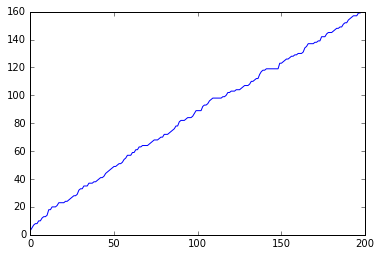

In [27]:
# Max degree
x = range(200)
pylab.plot(x, maxDegrees)
pylab.show()

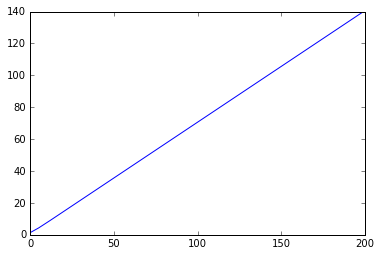

In [28]:
x = range(200)
pylab.plot(x, meanDegrees)
pylab.show()

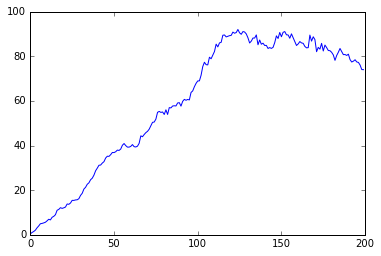

In [32]:
x = range(200)
pylab.plot(x, meanDegreeVariances)
pylab.show()